# Cluster 17

In [1]:
import gizmo_analysis as gizmo
import utilities as ut
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sl_utilities import distinct_colours as dc
from sl_utilities import distance_functions
import os
import pickle

In /home1/07428/binod/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home1/07428/binod/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home1/07428/binod/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home1/07428/binod/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home1/07428/binod/anaconda3/lib/

In [2]:
!hostname
!pwd

c506-021.stampede2.tacc.utexas.edu
/home1/07428/binod


In [3]:
simname = 'm12i_res7100_mhdcv'
simdir = '/scratch/projects/xsede/GalaxiesOnFIRE/cr_suite/m12i_res7100/mhdcv/1Myr/fire2/'
simtype="fire2"
snapnumber=596
snap=snapnumber
data_path="/home1/07428/binod/stampede_workfolder/fire2/fire2_data_pkl/" 
gas_datapath="/home1/07428/binod/stampede_workfolder/fire2/fire2_gas_data_pkl/"

gas_file_name=simtype+"_gas_data"+str(snapnumber)+".pkl"
cluster_data_name="all_clusters_at_snapshot_"+str(snapnumber)+".pkl" 


#############################################################################
#constants
#############################################################################

MsunToGm = 1.99e33
KpcToCm = 3.086e21
mp = 1.67e-24
#bin_edge = 10.
bin_edge = 30.

bins = np.arange(-5,5,0.1)
#bins = np.arange(-25,25,0.1)


# Loading cluster data and gas data

In [11]:
with open(data_path+cluster_data_name, "rb") as input:
    tracked_data= pickle.load(input)
      

with open(gas_datapath+gas_file_name, "rb") as input:
      import_gasdata = pickle.load(input)

cluster_group=1


In [12]:
tracked_data[cluster_group].keys()

dict_keys(['ind_tracked', 'age_tracked', 'x_tracked', 'y_tracked', 'z_tracked', 'vx_tracked', 'vy_tracked', 'vz_tracked', 'mass_tracked', 'xcm', 'ycm', 'zcm', 'delta_rxyz', 'rmax', 'ymax', 'ymin', 'xmax', 'xmin', 'avg_delta_rxyz', 'vR_cyl_tracked', 'vphi_cyl_tracked', 'vz_cyl_tracked'])

# Extracting age, location and metallicity information for the simulations

In [6]:
part=gizmo.io.Read.read_snapshots(['star'],'snapshot_index', snap, simulation_name=simname, simulation_directory=simdir, assign_hosts=True, assign_hosts_rotation=True)               #snap is the snapshot number here that changes everytime the loop iterates. It starts with sanpshot_start

age=part['star'].prop('age')
x=part['star'].prop('host.distance.principal')[:,0] #x component of the position of all stars 
y=part['star'].prop('host.distance.principal')[:,1] #y component of the position of all stars
z=part['star'].prop('host.distance.principal')[:,2] #z component of the position of all stars
Rxy = part['star'].prop('host.distance.principal.cylindrical')[:,0]

feh = part['star'].prop('metallicity.fe')
mgh = part['star'].prop('metallicity.mg')


# in utilities.simulation.Snapshot():
* reading:  scratch/projects/xsede/GalaxiesOnFIRE/cr_suite/m12i_res7100/mhdcv/1Myr/fire2/snapshot_times.txt

  using snapshot index = 596, redshift = 0.007


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  scratch/projects/xsede/GalaxiesOnFIRE/cr_suite/m12i_res7100/mhdcv/1Myr/fire2/output/snapdir_596/snapshot_596.0.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 70514272 particles
    dark2     (id = 2): 5513331 particles
    gas       (id = 0): 55685704 particles
    star      (id = 4): 15298647 particles
    blackhole (id = 5): 0 particles

* reading species: ['star']
* reading particles from:
    snapshot_596.0.hdf5
    snapshot_596.1.hdf5
    snapshot_596.2.hdf5
    snapshot_596.3.hdf5

* reading cosmological parameters from:  scratch/projects/xsede/GalaxiesOnFIRE/cr_suite/m12i_res7100/mhdcv/1Myr/fire2/initial_condition/ic_agora_m12i.conf

* checking sanity of particle properties
! warning: star

In [16]:
ind=tracked_data[1]["ind_tracked"]
#print(feh[ind])
print(x[ind])
print(id)
print(tracked_data[1]["x_tracked"])
print(len(tracked_data))


[-6.0062386  -6.00619153 -6.00349799 -6.01415946 -6.00812528 -6.01100886
 -6.00419566 -6.00562482 -6.0050974  -6.00964962 -6.00503285 -6.00939451
 -6.00745984 -6.00554434 -6.00951576 -6.00964411 -6.00307966 -6.00960962
 -6.00678715 -6.00950509 -6.01092185 -6.0024964  -6.00964288 -6.01307867
 -6.0006055  -5.99988107 -6.00808298 -6.00979852 -6.00954438 -6.00668641
 -6.00646929 -6.01159239 -6.00328777 -6.0017005  -6.00762546 -6.00654862
 -6.00777392 -6.00853963 -6.00698674 -6.01068292 -6.01534861 -6.00540532
 -6.00310962]
<built-in function id>
[-6.00513891 -6.00509183 -6.00239829 -6.01305976 -6.00702558 -6.00990916
 -6.00309596 -6.00452512 -6.0039977  -6.00854992 -6.00393315 -6.00829482
 -6.00636014 -6.00444464 -6.00841607 -6.00854442 -6.00197996 -6.00850992
 -6.00568745 -6.00840539 -6.00982215 -6.0013967  -6.00854318 -6.01197897
 -5.9995058  -5.99878137 -6.00698328 -6.00869882 -6.00844468 -6.00558671
 -6.00536959 -6.01049269 -6.00218807 -6.0006008  -6.00652576 -6.00544892
 -6.00667422 -

# Locating the CM of the cluster

In [14]:
xcm=tracked_data[cluster_group]["xcm"]
ycm=tracked_data[cluster_group]["ycm"]
print("The cluster is located at:",(xcm,ycm))
radius=((xcm)**2+(ycm)**2)**(1/2)
print("The cluster CM is at radius: ",radius)

circle_radius=((x-xcm)**2+(y-ycm)**2)**(1/2)

The cluster is located at: (-6.006235802999383, 6.0741827096947665)
The cluster CM is at radius:  8.542280966579506


In [15]:
region=np.linspace(1,10,10)/10
print(region)


[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


The cluster CM is at radius:  8.542280966579506
[0.009224116, 0.010101168, 0.010287676, 0.010287676, 0.010287676, 0.010248162, 0.010248162, 0.012120942, 0.012679408, 0.012679408]
The cluster CM is at radius:  8.378008344343753
[0.009618911, 0.010394423, 0.010287676, 0.010248162, 0.010248162, 0.010862815, 0.012120942, 0.012679408, 0.012679408, 0.016461851]
The cluster CM is at radius:  7.267613907013332
[0.013731767, 0.01320746, 0.012173227, 0.012490533, 0.012490533, 0.012490533, 0.012490533, 0.013367377, 0.014047973, 0.016206833]
The cluster CM is at radius:  9.11987390806396
[0.006505687, 0.005975571, 0.0060222642, 0.0060222642, 0.0060222642, 0.00598887, 0.00598887, 0.00598887, 0.00598887, 0.0060065365]
The cluster CM is at radius:  7.568254165173596
[0.013355973, 0.015007698, 0.014675359, 0.014675359, 0.014675359, 0.014930541, 0.014930541, 0.014809755, 0.016524203, 0.019894008]
The cluster CM is at radius:  6.057596706019052
[0.01817323, 0.01817323, 0.01817323, 0.01817323, 0.01817323

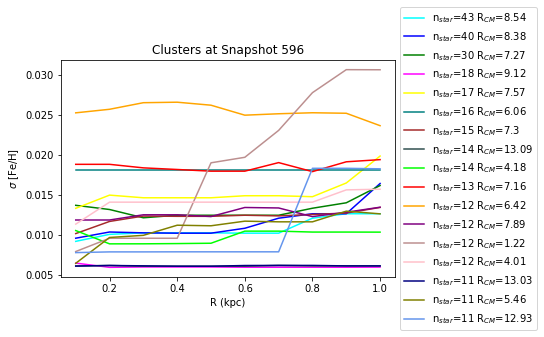

In [17]:
colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue','blueviolet','darkgreen'] #19 colors

fig1=plt.figure()
ax=fig1.add_subplot(111)

for cluster_group in tracked_data:
    sigma_f=list()
    xcm=tracked_data[cluster_group]["xcm"]
    ycm=tracked_data[cluster_group]["ycm"]
    radius=((xcm)**2+(ycm)**2)**(1/2)
    print("The cluster CM is at radius: ",radius)
    circle_radius=((x-xcm)**2+(y-ycm)**2)**(1/2)
    for r in region:
        keep = np.where((age <= .003) & (circle_radius<=r) & (abs(z) < 1.5))
        feh_region=feh[keep]
        sigma_feh_region=np.std(feh_region)
        sigma_f.append(sigma_feh_region)

    print(sigma_f)
    nstar=len(tracked_data[cluster_group]["x_tracked"])
    label_text=r"n$_{star}$="+str(nstar)+r" R$_{CM}$="+str(round(radius,2))
    ax.plot(region,sigma_f,label=label_text,c=colors[cluster_group-1])

ax.set_xlabel("R (kpc)")
ax.set_ylabel(r"$\sigma$ [Fe/H]")
ax.legend(bbox_to_anchor=(1,0.5), loc='center left')
ax.set_title("Clusters at Snapshot "+str(snapnumber))
fig1.savefig("sigma_feh_region.jpg",bbox_inches='tight',dpi=200)

In [ ]:
print(tracked_data[cluster_group]["ind_tracked"])